<div style="background-color:white;box-shadow:10px 10px   gray;color:black;font-size:70px;text-align:center;border-radius:20px">House Price Prediction</div>

<div style="text-align:center;font-size:26px;border-radus:10px;border-color:white;">Welcome to my attempt at the house price prediction price comptetion, Here I will try to get the lowest RMSE Using Simple Linear Regression model (along with some other models like Polynomial , Lasso , Ridge

# <div style="background-color:white;padding:20px;box-shadow:10px 10px  gray;color:black;font-size:40px;text-align:center;border-radius:20px">1- Data Preproccessing</div>

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import cross_val_score
np.random.seed(42)

In [2]:
# Import test and train csv's
train = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test  = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [3]:
#get train head to look at dataset
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


<div style="font-size:26px;border-radus:10px;border-color:white;">This Dataset has a lot of categorical columns and few numerical columns! <br>
Now let's seperate target SalePrice from the rest of the dataset</div>

In [4]:
X_train=train.drop(columns=['Id','SalePrice'])
y_train=np.log1p(train['SalePrice']) 
#IMPORTANT: don't forget to log sale price so the RMSE is not too large

test_features=test.drop(columns=['Id'])
#test dataset without ID to have same columns as train, and will not matter in our model

full=pd.concat([X_train,test_features], axis=0)
#a large dataset combining both training and test datasets to keep preproccessing consistent

In [5]:
full_encoded=pd.get_dummies(full,drop_first=True)

"""get dummies encodes the categroical columns automatically
converts these categories into numeric columns (0/1) 
so models can use them.
"""
full_encoded

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,False,False,False,False,True,False,False,False,True,False
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,False,False,False,False,True,False,False,False,False,False
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,False,False,False,False,True,False,False,False,True,False
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,False,False,False,False,True,False,False,False,False,False
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,False,False,False,False,True,False,False,False,False,False
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,False,False,False,False,True,False,False,False,True,False


<div style="font-size:26px;border-radus:10px;border-color:white;"><p style="padding:10px;">To avoid multicollinearity in linear models, we drop the first category.  </p>
<ul>
<li> This way, the model can infer the missing category from the others.</li>
<li> Models Like LinearRegression(), Lasso can handle the dataset properly</li>
</ul>
</div>

In [6]:
#Sepearate Train and Test Datasets
train_dataset=full_encoded.iloc[:len(train),:]
test_dataset=full_encoded.iloc[len(train):,:]

In [7]:
#Full Null values with zero since rest are encoded
train_dataset=train_dataset.fillna(0)
test_dataset=test_dataset.fillna(0)

# <div style="background-color:white;padding:20px;box-shadow:10px 10px  gray;color:black;font-size:40px;text-align:center;border-radius:20px">2- Models</div>

<div style="font-size:26px;border-radus:10px;border-color:white;"><h4>Now we will try Different models and see which will get us higher accuracy and peformance, we will try the following models</h4>
<ol>
<li>LinearRegression()</li>
<li>Polynomial</li>
<li>Lasso</li>
<li>Ridge</li>
</ol>
</div>

In [8]:
#imports
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

## 1- Linear Regression

In [9]:
#linear regression model
model=LinearRegression()
model.fit(train_dataset,y_train)
prediction=model.predict(test_dataset)
pred_exp=np.expm1(prediction)

# Compute MSE
mse = mean_squared_error(y_train[0:1459], prediction)
rmse = np.sqrt(mse)

print(f"Mean Squared Error (MSE): {mse:.5f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")

Mean Squared Error (MSE): 0.31806
Root Mean Squared Error (RMSE): 0.56396


## 2- Lasso Regression

In [10]:
# Lasso adds L1 regularization, which can shrink coefficients to zero,
# effectively performing feature selection.
# The 'alpha' parameter controls the strength of the regularization.

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(train_dataset,y_train)
y_pred_lasso = lasso_model.predict(test_dataset)
mse_lasso = mean_squared_error(y_train[:1459], y_pred_lasso)
r2_lasso = r2_score(y_train[:1459], y_pred_lasso)
print(f"Mean Squared Error: {mse_lasso:.2f}")
print(f"R-squared (R2) Score: {r2_lasso:.2f}")
print("Note: The coefficients for irrelevant features will be pushed towards zero.\n")


Mean Squared Error: 0.28
R-squared (R2) Score: -0.74
Note: The coefficients for irrelevant features will be pushed towards zero.



## 3- Polynomial Regression

In [11]:
# This model captures non-linear relationships by creating new polynomial features.
# It is essentially a Linear Regression model trained on a transformed dataset.

# Create polynomial features (e.g., x^2, x*y)
# The degree parameter controls the complexity of the model.
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(train_dataset)
X_test_poly = poly.transform(test_dataset)

# Train a Linear Regression model on the new polynomial features
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_pred_poly = poly_model.predict(X_test_poly)

mse_poly = mean_squared_error(y_train[:1459], y_pred_poly)
r2_poly = r2_score(y_train[:1459], y_pred_poly)
print(f"Mean Squared Error: {mse_poly:.2f}")
print(f"R-squared (R2) Score: {r2_poly:.2f}")

Mean Squared Error: 8.09
R-squared (R2) Score: -49.71


## 4- Ridge

In [12]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=10)  # You can tune alpha later
ridge.fit(train_dataset,y_train)

# Predict on validation set
y_pred_ridge = ridge.predict(test_dataset)

# Compute MSE and RMSE
mse = mean_squared_error(y_train[:1459], y_pred_ridge)
rmse = np.sqrt(mse)

print(f"Ridge Regression MSE (log-space): {mse:.5f}")
print(f"Ridge Regression RMSE (log-space): {rmse:.5f}")

Ridge Regression MSE (log-space): 0.30307
Ridge Regression RMSE (log-space): 0.55052


<div style="font-size:26px;border-radus:10px;border-color:white;">Based on the modelling we can conclude that:
<ul>
    

<li>Ridge and linear are similar in MSE and RMSE</li>
<li>Lasso was lower in MSE but higher in RMSE </li>
<li>Polynomial Can't work on get_dummies dataset </li>
</ul>
</div>

# Submission:

In [13]:
test_id=test['Id']
test_id

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [14]:
y_pred_r=np.expm1(y_pred_ridge)

In [15]:
sub_data=pd.DataFrame({
    'Id':test_id,
    'SalePrice':y_pred_r
})
sub_data.to_csv("lassoprediction.csv", index=False)
print("Submission file created!")

Submission file created!


<div style="font-size:20px;">Ridge got me the best submission score of 0.13</div> 

# <div style="background-color:white;padding:20px;box-shadow:10px 10px  gray;color:black;font-size:40px;text-align:center;border-radius:20px">3- Plotting</div>

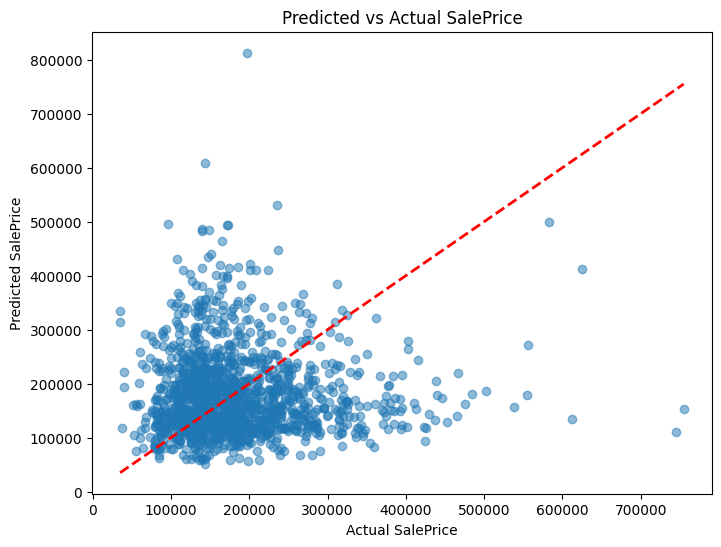

In [16]:
import matplotlib.pyplot as plt

y_train_exp=np.expm1(y_train[0:1459])

plt.figure(figsize=(8,6))
plt.scatter(y_train_exp, y_pred_r, alpha=0.5)
plt.plot([y_train_exp.min(), y_train_exp.max()], [y_train_exp.min(), y_train_exp.max()], 'r--', lw=2)  # 45-degree line
plt.xlabel("Actual SalePrice")
plt.ylabel("Predicted SalePrice")
plt.title("Predicted vs Actual SalePrice")
plt.show()

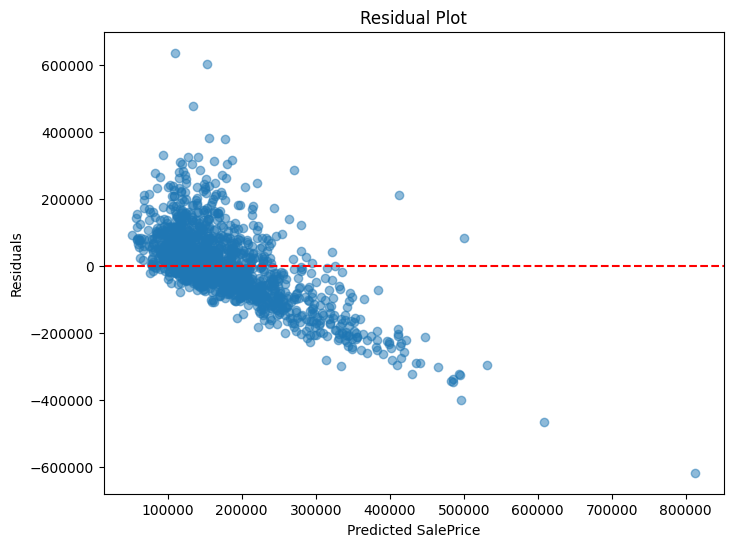

In [17]:
residuals = y_train_exp - y_pred_r

plt.figure(figsize=(8,6))
plt.scatter(y_pred_r, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


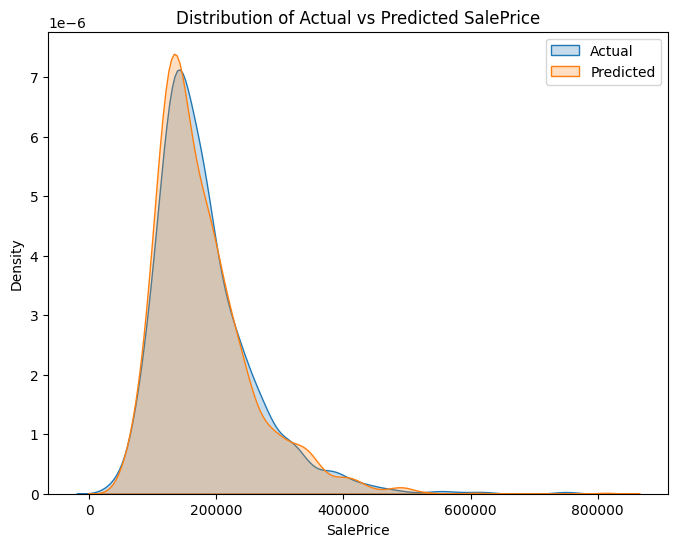

In [18]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.kdeplot(y_train_exp, label="Actual", fill=True)
sns.kdeplot(y_pred_r, label="Predicted", fill=True)
plt.legend()
plt.title("Distribution of Actual vs Predicted SalePrice")
plt.show()